In [ ]:
# Exploring quality of the data in the bam files of GSE118258

import os
import subprocess

# List of BAM files
bam_files = [
    "/Volumes/BioinforSSD/DATASETS_JUNE/GSE118258/D0_10X.bam",
    "/Volumes/BioinforSSD/DATASETS_JUNE/GSE118258/D2_10X.bam",
    "/Volumes/BioinforSSD/DATASETS_JUNE/GSE118258/D8_10X.bam",
    "/Volumes/BioinforSSD/DATASETS_JUNE/GSE118258/D12_10X.bam",
    "/Volumes/BioinforSSD/DATASETS_JUNE/GSE118258/D16-_10X.bam",
    "/Volumes/BioinforSSD/DATASETS_JUNE/GSE118258/D16+_10X.bam"
]

# Full path to Qualimap
qualimap_path = "/Volumes/BioinforSSD/PROGRAMS_AND_ENVS/Programs/qualimap_v2.3/qualimap"

# Create output directory
os.makedirs("quality_check_results", exist_ok=True)

# Function to run samtools flagstat
def run_samtools_flagstat(bam_file):
    output_file = f"quality_check_results/{os.path.basename(bam_file)}_flagstat.txt"
    subprocess.run(f"samtools flagstat {bam_file} > {output_file}", shell=True)

# Function to run Qualimap
def run_qualimap(bam_file):
    output_dir = f"quality_check_results/{os.path.basename(bam_file)}_qualimap"
    command = f"{qualimap_path} bamqc -bam {bam_file} -outdir {output_dir} --java-mem-size=4G"
    print(f"Running: {command}")
    subprocess.run(command, shell=True)

# Run quality checks on each BAM file
for bam_file in bam_files:
    print(f"Processing {bam_file}...")
    run_samtools_flagstat(bam_file)
    run_qualimap(bam_file)

# Run MultiQC to aggregate results
subprocess.run("multiqc quality_check_results -o quality_check_results/multiqc", shell=True)

print("Quality check complete. Results are in the 'quality_check_results' directory.")

Processing /Volumes/BioinforSSD/DATASETS_JUNE/GSE118258/D0_10X.bam...
Running: /Volumes/BioinforSSD/PROGRAMS_AND_ENVS/Programs/qualimap_v2.3/qualimap bamqc -bam /Volumes/BioinforSSD/DATASETS_JUNE/GSE118258/D0_10X.bam -outdir quality_check_results/D0_10X.bam_qualimap --java-mem-size=4G
Java memory size is set to 4G
Launching application...

QualiMap v.2.3
Built on 2023-05-19 16:57

Selected tool: bamqc
Available memory (Mb): 35
Max memory (Mb): 4294
Starting bam qc....
Loading sam header...
Loading locator...
Loading reference...
Number of windows: 400, effective number of windows: 483
Chunk of reads size: 1000
Number of threads: 12
Processed 50 out of 483 windows...
Processed 100 out of 483 windows...
Processed 150 out of 483 windows...
Processed 200 out of 483 windows...
Processed 250 out of 483 windows...
Processed 300 out of 483 windows...
Processed 350 out of 483 windows...
Processed 400 out of 483 windows...
Processed 450 out of 483 windows...
Total processed windows:483
Number of


/// ]8;id=106159;https://multiqc.info\MultiQC]8;;\ 🔍 v1.23

       file_search | Search path: /Users/noecrespo/Desktop/quality_check_results
         searching | ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100% 282/282  0m  
          qualimap | Found 6 BamQC reports
          samtools | Found 6 flagstat reports
     write_results | Data        : quality_check_results/multiqc/multiqc_data


Quality check complete. Results are in the 'quality_check_results' directory.


     write_results | Report      : quality_check_results/multiqc/multiqc_report.html
           multiqc | MultiQC complete


In [1]:
# Exploring UMI file

import pandas as pd

umi_file = "/Volumes/BioinforSSD/DATASETS_JUNE/GSE118258/metadata/GSE118258_UMI.csv"

# Read only the first few rows
umi_sample = pd.read_csv(umi_file, index_col=0, nrows=5)

print("First 5 rows of UMI file:")
print(umi_sample)

print("\nColumns:")
print(umi_sample.columns)

print("\nSample of index (cell barcodes):")
print(umi_sample.index)

# Get file info without reading the entire file
with open(umi_file, 'r') as f:
    num_lines = sum(1 for line in f)

print(f"\nTotal number of lines in the file: {num_lines}")

# Read the last few lines
tail = pd.read_csv(umi_file, index_col=0, nrows=5, skiprows=num_lines-6)

print("\nLast 5 rows of UMI file:")
print(tail)

First 5 rows of UMI file:
                 AAACCTGAGGAGTTGC-1  AAACCTGAGTACTTGC-1  AAACCTGAGTATGACA-1  \
ENSG00000243485                   0                   0                   0   
ENSG00000237613                   0                   0                   0   
ENSG00000186092                   0                   0                   0   
ENSG00000238009                   0                   0                   0   
ENSG00000239945                   0                   0                   0   

                 AAACCTGCACCATGTA-1  AAACCTGCACCTTGTC-1  AAACCTGCACGGTGTC-1  \
ENSG00000243485                   0                   0                   0   
ENSG00000237613                   0                   0                   0   
ENSG00000186092                   0                   0                   0   
ENSG00000238009                   0                   0                   0   
ENSG00000239945                   0                   0                   0   

                 AAACCTG

In [3]:
# Exploring annotation file
import numpy as np
import pandas as pd

# File path
annotation_file = "/Volumes/BioinforSSD/DATASETS_JUNE/GSE118258/metadata/GSE118258_Annotation.txt"

# Read the annotation file
print("Reading annotation file...")
annotation_df = pd.read_csv(annotation_file, sep='\t', index_col=0)

print("\nAnnotation file shape:", annotation_df.shape)

print("\nColumns in the annotation file:")
for column in annotation_df.columns:
    print(f"\nColumn: {column}")
    print("Unique values:")
    unique_values = annotation_df[column].unique()
    for value in unique_values:
        count = annotation_df[column].value_counts()[value]
        print(f"  {value}: {count}")

print("\nFirst few rows of the annotation file:")
print(annotation_df.head())

print("\nLast few rows of the annotation file:")
print(annotation_df.tail())

# Check for any missing values
print("\nMissing values in each column:")
print(annotation_df.isnull().sum())

# Check data types of each column
print("\nData types of each column:")
print(annotation_df.dtypes)

# If there are any numeric columns, show basic statistics
numeric_columns = annotation_df.select_dtypes(include=[np.number]).columns
if len(numeric_columns) > 0:
    print("\nBasic statistics for numeric columns:")
    print(annotation_df[numeric_columns].describe())

print("\nSample of 5 random rows:")
print(annotation_df.sample(5))

Reading annotation file...

Annotation file shape: (32138, 1)

Columns in the annotation file:

Column: Time-point
Unique values:
  D0: 7079
  D2: 4988
  D8: 3619
  D12: 7013
  D16_negative: 6781
  D16_positive: 2658

First few rows of the annotation file:
                   Time-point
Cell ID                      
AAACCTGAGGAGTTGC-1         D0
AAACCTGAGTACTTGC-1         D0
AAACCTGAGTATGACA-1         D0
AAACCTGCACCATGTA-1         D0
AAACCTGCACCTTGTC-1         D0

Last few rows of the annotation file:
                      Time-point
Cell ID                         
TTTGGTTGTTACGACT-6  D16_positive
TTTGGTTTCTGTCTCG-6  D16_positive
TTTGGTTTCTTCGGTC-6  D16_positive
TTTGTCACAATGTAAG-6  D16_positive
TTTGTCATCCAAGTAC-6  D16_positive

Missing values in each column:
Time-point    0
dtype: int64

Data types of each column:
Time-point    object
dtype: object

Sample of 5 random rows:
                   Time-point
Cell ID                      
ACTGAACGTTATGTGC-1         D0
CAGCTGGCAGTACACT-1     

In [9]:
# Creating h5ad file

import pandas as pd
import scanpy as sc
import numpy as np

# File paths
umi_file = "/Volumes/BioinforSSD/DATASETS_JUNE/GSE118258/metadata/GSE118258_UMI.csv"
annotation_file = "/Volumes/BioinforSSD/DATASETS_JUNE/GSE118258/metadata/GSE118258_Annotation.txt"

print("Reading UMI file...")
adata = sc.read_csv(umi_file, first_column_names=True).T

print("Adding sample information...")
adata.obs['sample'] = [cell.split('-')[-1] for cell in adata.obs_names]

print("Adding metadata...")
annotation_df = pd.read_csv(annotation_file, sep='\t', index_col=0)
adata.obs = adata.obs.join(annotation_df, how='left')

print("Calculating QC metrics...")
sc.pp.calculate_qc_metrics(adata, inplace=True)

print("Adding layers for scGPT compatibility...")
adata.layers["counts"] = adata.X.copy()
adata.layers["log1p"] = sc.pp.log1p(adata.X)

print("Saving h5ad file...")
adata.write_h5ad("/Volumes/BioinforSSD/DATASETS_JUNE/GSE118258/GSE118258_scRNA_seq.h5ad")

print("H5AD file created successfully!")

# Print some basic statistics
print(f"\nNumber of cells: {adata.n_obs}")
print(f"Number of genes: {adata.n_vars}")
print("Sample distribution:")
print(adata.obs['sample'].value_counts())

# Check if QC metrics are present
qc_metrics = ['n_genes_by_counts', 'total_counts', 'n_genes']
missing_metrics = [metric for metric in qc_metrics if metric not in adata.obs.columns]

if missing_metrics:
    print(f"\nWarning: The following QC metrics are missing: {', '.join(missing_metrics)}")
    print("Calculating basic metrics manually...")
    
    adata.obs['n_genes'] = (adata.X > 0).sum(axis=1)
    adata.obs['total_counts'] = adata.X.sum(axis=1)

print(f"\nMean genes per cell: {adata.obs['n_genes'].mean():.2f}")
print(f"Median genes per cell: {adata.obs['n_genes'].median():.2f}")
print(f"Mean counts per cell: {adata.obs['total_counts'].mean():.2f}")
print(f"Median counts per cell: {adata.obs['total_counts'].median():.2f}")

print("\nMetadata columns:", adata.obs.columns.tolist())

# Additional information about the AnnData object
print("\nAnnData object information:")
print(adata)

# Check the contents of adata.obs
print("\nFirst few rows of adata.obs:")
print(adata.obs.head())

# Check the contents of adata.var
print("\nFirst few rows of adata.var:")
print(adata.var.head())

Reading UMI file...
Adding sample information...
Adding metadata...
Calculating QC metrics...
Adding layers for scGPT compatibility...
Saving h5ad file...
H5AD file created successfully!

Number of cells: 32138
Number of genes: 32738
Sample distribution:
sample
1    7079
4    7013
5    6781
2    4988
3    3619
6    2658
Name: count, dtype: int64

Calculating basic metrics manually...

Mean genes per cell: 4007.88
Median genes per cell: 3986.00
Mean counts per cell: 4867.19
Median counts per cell: 4743.17

Metadata columns: ['sample', 'Time-point', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'n_genes']

AnnData object information:
AnnData object with n_obs × n_vars = 32138 × 32738
    obs: 'sample', 'Time-point', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes

In [11]:
# Lets explore again the h5ad file created:

import scanpy as sc
import pandas as pd
import numpy as np

# Load the data
adata = sc.read_h5ad("/Volumes/BioinforSSD/DATASETS_JUNE/GSE118258/H5AD_FILES/GSE118258_scRNA_seq_analyzed.h5ad")

print("AnnData object information:")
print(adata)

print("\nShape of adata:", adata.shape)

print("\nColumns in adata.obs:")
print(adata.obs.columns)

print("\nFirst few rows of adata.obs:")
print(adata.obs.head())

print("\nColumns in adata.var:")
print(adata.var.columns)

print("\nFirst few rows of adata.var:")
print(adata.var.head())

print("\nLayers in adata:")
print(list(adata.layers.keys()))

# Function to print unique values
def print_unique_values(df, name, max_values=10):
    print(f"\nSample of unique values in {name}:")
    for column in df.columns:
        unique_values = df[column].unique()
        print(f"\n{column}:")
        if df[column].dtype == 'object' or df[column].dtype.name == 'category':
            print(list(unique_values[:max_values]) + (["..."] if len(unique_values) > max_values else []))
        elif np.issubdtype(df[column].dtype, np.number):
            if len(unique_values) > max_values:
                print(f"Min: {unique_values.min()}, Max: {unique_values.max()}")
            else:
                print(list(unique_values))
        else:
            print(list(unique_values[:max_values]) + (["..."] if len(unique_values) > max_values else []))
        print(f"Total unique values: {len(unique_values)}")

print_unique_values(adata.obs, "adata.obs")
print_unique_values(adata.var, "adata.var")

AnnData object information:
AnnData object with n_obs × n_vars = 32138 × 32738
    obs: 'Time-point', 'sample', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'leiden'
    var: 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'hvg', 'leiden', 'log1p', 'neighbors', 'pca', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'counts', 'log1p'
    obsp: 'connectivities', 'distances'

Shape of adata: (32138, 32738)

Columns in adata.obs:
Index(['Time-point', 'sample', 'n_genes_by_counts', 'log1p_n_genes_by_counts',
       'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes',
       'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes',
       'pct_counts_in_top

In [12]:
# Now we add gene_name info
import scanpy as sc
import mygene
import pandas as pd

# Load the data
adata = sc.read_h5ad("/Volumes/BioinforSSD/DATASETS_JUNE/GSE118258/H5AD_FILES/GSE118258_scRNA_seq_analyzed.h5ad")

# Initialize mygene client
mg = mygene.MyGeneInfo()

# Get the current gene IDs (Ensembl IDs)
gene_ids = adata.var.index.tolist()

# Query mygene for gene names
gene_info = mg.querymany(gene_ids, scopes='ensembl.gene', fields='symbol', species='human', verbose=False)

# Create a dictionary mapping gene IDs to gene names
gene_name_dict = {info['query']: info.get('symbol', info['query']) for info in gene_info if 'query' in info}

# Add gene names to adata.var
adata.var['gene_name'] = adata.var.index.map(gene_name_dict)

# Ensure 'gene_name' is filled for all genes
adata.var.loc[adata.var['gene_name'].isnull(), 'gene_name'] = adata.var.index[adata.var['gene_name'].isnull()]

# Move 'gene_name' to be the first column
cols = adata.var.columns.tolist()
cols = ['gene_name'] + [col for col in cols if col != 'gene_name']
adata.var = adata.var[cols]

# Save the updated AnnData object
adata.write_h5ad("/Volumes/BioinforSSD/DATASETS_JUNE/GSE118258/H5AD_FILES/GSE118258_scRNA_seq_analyzed_with_gene_names.h5ad")

# Print some information about the updated object
print("Updated columns in adata.var:")
print(adata.var.columns)

print("\nFirst few rows of adata.var:")
print(adata.var.head())

print("\nShape of updated adata:", adata.shape)

# Function to print unique values
def print_unique_values(df, name, max_values=10):
    print(f"\nSample of unique values in {name}:")
    for column in df.columns:
        unique_values = df[column].unique()
        print(f"\n{column}:")
        if df[column].dtype == 'object' or df[column].dtype.name == 'category':
            print(list(unique_values[:max_values]) + (["..."] if len(unique_values) > max_values else []))
        elif pd.api.types.is_numeric_dtype(df[column]):
            if len(unique_values) > max_values:
                print(f"Min: {unique_values.min()}, Max: {unique_values.max()}")
            else:
                print(list(unique_values))
        else:
            print(list(unique_values[:max_values]) + (["..."] if len(unique_values) > max_values else []))
        print(f"Total unique values: {len(unique_values)}")

# Print unique values in adata.var
print_unique_values(adata.var, "adata.var")


Updated columns in adata.var:
Index(['gene_name', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts',
       'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts',
       'highly_variable', 'means', 'dispersions', 'dispersions_norm'],
      dtype='object')

First few rows of adata.var:
                       gene_name  n_cells_by_counts  mean_counts  \
ENSG00000243485      MIR1302-2HG                  0     0.000000   
ENSG00000237613          FAM138A                  0     0.000000   
ENSG00000186092            OR4F5                  0     0.000000   
ENSG00000238009  ENSG00000238009                139     0.004387   
ENSG00000239945  ENSG00000239945                  0     0.000000   

                 log1p_mean_counts  pct_dropout_by_counts  total_counts  \
ENSG00000243485           0.000000              100.00000           0.0   
ENSG00000237613           0.000000              100.00000           0.0   
ENSG00000186092           0.000000              100.00000         

In [13]:
# Now we explore again the h5ad file after adding gene name info

import scanpy as sc
import pandas as pd
import numpy as np

# Load the data
adata = sc.read_h5ad("/Volumes/BioinforSSD/DATASETS_JUNE/GSE118258/H5AD_FILES/GSE118258_scRNA_seq_analyzed_with_gene_names.h5ad")

print("AnnData object information:")
print(adata)

print("\nShape of adata:", adata.shape)

print("\nColumns in adata.obs:")
print(adata.obs.columns)

print("\nFirst few rows of adata.obs:")
print(adata.obs.head())

print("\nColumns in adata.var:")
print(adata.var.columns)

print("\nFirst few rows of adata.var:")
print(adata.var.head())

print("\nLayers in adata:")
print(list(adata.layers.keys()))

# Function to print unique values
def print_unique_values(df, name, max_values=10):
    print(f"\nSample of unique values in {name}:")
    for column in df.columns:
        unique_values = df[column].unique()
        print(f"\n{column}:")
        if df[column].dtype == 'object' or df[column].dtype.name == 'category':
            print(list(unique_values[:max_values]) + (["..."] if len(unique_values) > max_values else []))
        elif np.issubdtype(df[column].dtype, np.number):
            if len(unique_values) > max_values:
                print(f"Min: {unique_values.min()}, Max: {unique_values.max()}")
            else:
                print(list(unique_values))
        else:
            print(list(unique_values[:max_values]) + (["..."] if len(unique_values) > max_values else []))
        print(f"Total unique values: {len(unique_values)}")

print_unique_values(adata.obs, "adata.obs")
print_unique_values(adata.var, "adata.var")

AnnData object information:
AnnData object with n_obs × n_vars = 32138 × 32738
    obs: 'Time-point', 'sample', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'leiden'
    var: 'gene_name', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'hvg', 'leiden', 'log1p', 'neighbors', 'pca', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'counts', 'log1p'
    obsp: 'connectivities', 'distances'

Shape of adata: (32138, 32738)

Columns in adata.obs:
Index(['Time-point', 'sample', 'n_genes_by_counts', 'log1p_n_genes_by_counts',
       'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes',
       'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes',
       'pct_

In [14]:
import scanpy as sc
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el dataset
adata = sc.read_h5ad("/Volumes/BioinforSSD/DATASETS_JUNE/GSE118258/H5AD_FILES/GSE118258_scRNA_seq_analyzed_with_gene_names.h5ad")

# Información básica
print(f"Nombre del dataset: {adata.uns.get('dataset_name', 'No especificado')}")
print(f"Número de células: {adata.n_obs}")
print(f"Número de genes: {adata.n_vars}")
print(f"Puntos temporales: {sorted(adata.obs['sample'].unique())}")
print(f"Tecnología de secuenciación: {adata.uns.get('sequencing_technology', 'No especificado')}")

# Gráficos de control de calidad
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
sc.pl.violin(adata, 'n_genes_by_counts', jitter=0.4, ax=axs[0], show=False)
axs[0].set_title('Número de genes por célula')
sc.pl.violin(adata, 'total_counts', jitter=0.4, ax=axs[1], show=False)
axs[1].set_title('Número de UMIs por célula')
if 'pct_counts_mt' in adata.obs.columns:
    sc.pl.violin(adata, 'pct_counts_mt', jitter=0.4, ax=axs[2], show=False)
    axs[2].set_title('Porcentaje de genes mitocondriales')
else:
    axs[2].set_title('Datos mitocondriales no disponibles')
    axs[2].axis('off')
plt.tight_layout()
plt.savefig(f'{adata.uns.get("dataset_name", "dataset")}_qc_plots.png')
plt.close()

# Visualización UMAP
sc.pl.umap(adata, color='sample', save=f'{adata.uns.get("dataset_name", "dataset")}_umap_by_timepoint.png', show=False)

print(f"Gráficos guardados como {adata.uns.get('dataset_name', 'dataset')}_qc_plots.png y {adata.uns.get('dataset_name', 'dataset')}_umap_by_timepoint.png")

Nombre del dataset: No especificado
Número de células: 32138
Número de genes: 32738
Puntos temporales: ['1', '2', '3', '4', '5', '6']
Tecnología de secuenciación: No especificado
Gráficos guardados como dataset_qc_plots.png y dataset_umap_by_timepoint.png


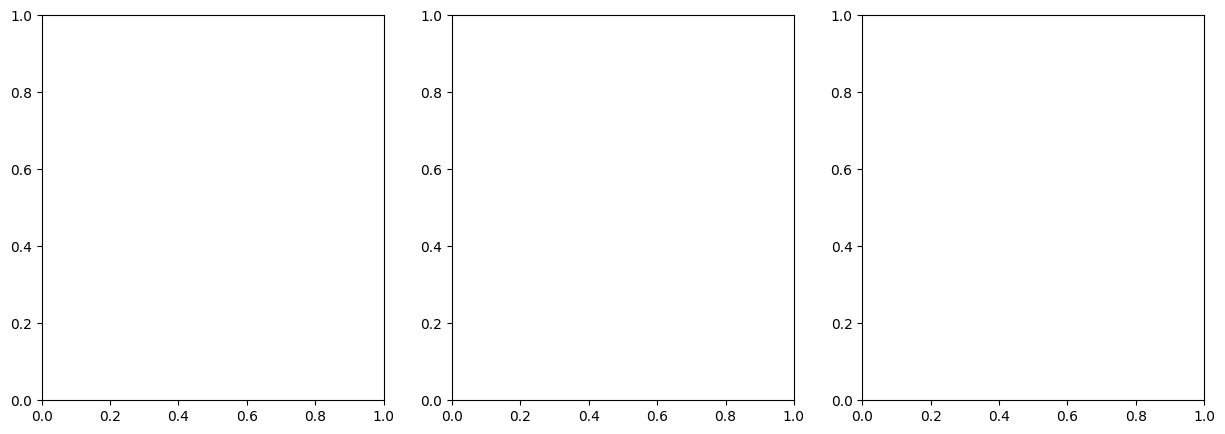

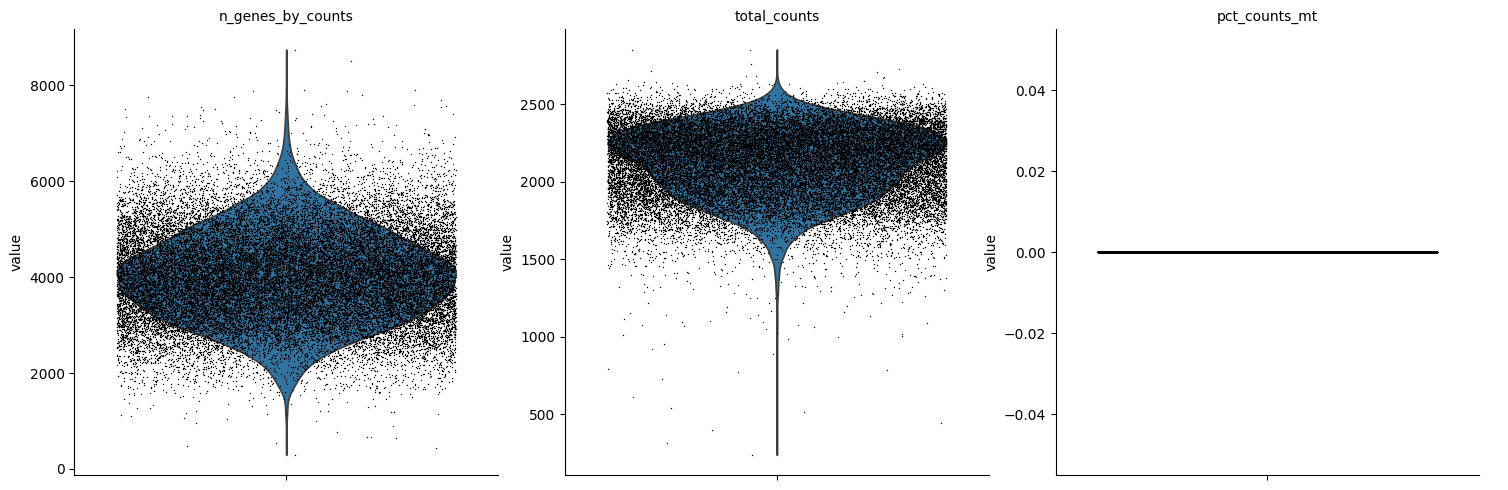

Promedio de porcentaje de conteos mitocondriales: 0.00%
Mediana de porcentaje de conteos mitocondriales: 0.00%


In [15]:
import scanpy as sc
import matplotlib.pyplot as plt

# Cargar el dataset
adata = sc.read_h5ad("/Volumes/BioinforSSD/DATASETS_JUNE/GSE118258/H5AD_FILES/GSE118258_scRNA_seq_analyzed_with_gene_names.h5ad")

# Identificar genes mitocondriales
adata.var['mt'] = adata.var['gene_name'].str.startswith('MT-')

# Calcular el porcentaje de conteos mitocondriales
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)

# Visualizar la distribución del porcentaje de genes mitocondriales
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'], 
             jitter=0.4, multi_panel=True, ax=axs)
plt.tight_layout()
plt.savefig('qc_metrics_with_mt.png')
plt.close()

# Imprimir algunas estadísticas
print(f"Promedio de porcentaje de conteos mitocondriales: {adata.obs['pct_counts_mt'].mean():.2f}%")
print(f"Mediana de porcentaje de conteos mitocondriales: {adata.obs['pct_counts_mt'].median():.2f}%")

# Guardar el objeto AnnData actualizado
adata.write_h5ad("/Volumes/BioinforSSD/DATASETS_JUNE/GSE118258/H5AD_FILES/GSE118258_scRNA_seq_analyzed_with_mt.h5ad")

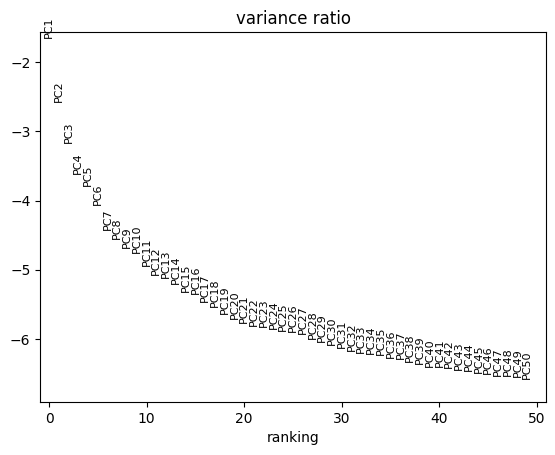

Varianza explicada acumulada:
PC10: 41.85%
PC20: 46.81%
PC50: 52.98%


In [3]:
import scanpy as sc
import matplotlib.pyplot as plt

# Cargar el dataset
adata = sc.read_h5ad("/Volumes/BioinforSSD/DATASETS_JUNE/GSE118258/H5AD_FILES/GSE118258_scRNA_seq_analyzed_with_gene_names.h5ad")

# Realizar PCA si no se ha hecho antes
if 'X_pca' not in adata.obsm.keys():
    sc.pp.pca(adata)

# Graficar el codo de varianza explicada
sc.pl.pca_variance_ratio(adata, n_pcs=50, log=True)
plt.title('PCA Variance Ratio - GSE118258')
plt.tight_layout()
plt.savefig('pca_variance_ratio_GSE118258.png')
plt.close()

print("Varianza explicada acumulada:")
print(f"PC10: {adata.uns['pca']['variance_ratio'].cumsum()[9]:.2%}")
print(f"PC20: {adata.uns['pca']['variance_ratio'].cumsum()[19]:.2%}")
print(f"PC50: {adata.uns['pca']['variance_ratio'].cumsum()[49]:.2%}")